In [ ]:
!pip install noisereduce

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import os
import noisereduce as nr

def resize_audio(input_path, target_size):
    """
    Hàm thay đổi kích thước của âm thanh.

    Parameters:
    - input_path: Đường dẫn tới file âm thanh gốc.
    - target_size: Kích thước mong muốn của âm thanh (số mẫu).
    """
    audio_data, sample_rate = librosa.load(input_path, sr=None)

    # Thay đổi kích thước âm thanh cho đúng target_size
    if len(audio_data) < target_size:
        # Thêm padding nếu âm thanh ngắn hơn target_size
        audio_data = np.pad(audio_data, (0, target_size - len(audio_data)))
    else:
        # Cắt bớt nếu âm thanh dài hơn target_size
        audio_data = audio_data[:target_size]

    # Lưu lại âm thanh đã thay đổi kích thước
    return audio_data, sample_rate

def reduce_noise(input_path, output_path):
    """
    Hàm lọc nhiễu và lưu kết quả vào file đầu ra.
    """
    try:
        audio_data, sample_rate = librosa.load(input_path, sr=None)
        reduced_noise = nr.reduce_noise(y=audio_data, sr=sample_rate)
        sf.write(output_path, reduced_noise, sample_rate)
        return reduced_noise, sample_rate
    except Exception as e:
        print(f"Error processing {input_path}: {e}")
        return None, None

def trim_silence(input_path, output_path, top_db=20):
    """
    Hàm cắt khoảng lặng ở đầu và cuối file âm thanh và lưu kết quả.
    """
    try:
        audio_data, sample_rate = librosa.load(input_path, sr=None)
        trimmed_audio, _ = librosa.effects.trim(audio_data, top_db=top_db)
        sf.write(output_path, trimmed_audio, sample_rate)
        return trimmed_audio, sample_rate
    except Exception as e:
        print(f"Error processing {input_path}: {e}")
        return None, None

def preprocess_audio(audio_path, output_dir, target_size=31744):
    """
    Pipeline xử lý âm thanh bao gồm lọc nhiễu, cắt khoảng lặng,
    thay đổi kích thước và trích xuất MFCC.
    """
    # Tạo đường dẫn lưu file đầu ra
    audio_file = os.path.basename(audio_path)
    output_path = os.path.join(output_dir, audio_file.replace('.wav', '.npy'))

    # Lọc nhiễu
    noise_reduced_audio, sample_rate = reduce_noise(audio_path, audio_path)
    if noise_reduced_audio is None:
        return

    # Cắt khoảng lặng
    trimmed_audio, sample_rate = trim_silence(audio_path, audio_path)
    if trimmed_audio is None:
        return

    # Thay đổi kích thước âm thanh
    resized_audio, sample_rate = resize_audio(audio_path, target_size)

    # Trích xuất MFCC
    mfccs = librosa.feature.mfcc(y=resized_audio, sr=sample_rate, n_mfcc=13)

    # Kiểm tra và tạo thư mục output nếu chưa có
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Lưu MFCC dưới dạng file .npy
    np.save(output_path, mfccs)
    print(f"Đã lưu MFCC cho {audio_file} vào {output_path}")

# Đường dẫn thư mục đầu vào và thư mục đầu ra
input_audio_folder = "/content/input_audio"
output_audio_folder = "/content/output_audio"

# Lặp qua tất cả các file .wav trong thư mục input_audio và xử lý
for audio_file in os.listdir(input_audio_folder):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(input_audio_folder, audio_file)
        preprocess_audio(audio_path, output_audio_folder)


Đã lưu MFCC cho output111.wav vào /content/output_audio/output111.npy
Đã lưu MFCC cho output50.wav vào /content/output_audio/output50.npy
Đã lưu MFCC cho output127.wav vào /content/output_audio/output127.npy
Đã lưu MFCC cho output146.wav vào /content/output_audio/output146.npy
Đã lưu MFCC cho output25.wav vào /content/output_audio/output25.npy
Đã lưu MFCC cho output27.wav vào /content/output_audio/output27.npy
Đã lưu MFCC cho output6.wav vào /content/output_audio/output6.npy
Đã lưu MFCC cho output62.wav vào /content/output_audio/output62.npy
Đã lưu MFCC cho output51.wav vào /content/output_audio/output51.npy
Đã lưu MFCC cho output157.wav vào /content/output_audio/output157.npy
Đã lưu MFCC cho output4.wav vào /content/output_audio/output4.npy
Đã lưu MFCC cho output19.wav vào /content/output_audio/output19.npy
Đã lưu MFCC cho output55.wav vào /content/output_audio/output55.npy
Đã lưu MFCC cho output117.wav vào /content/output_audio/output117.npy
Đã lưu MFCC cho output59.wav vào /content/

/usr/local/lib/python3.10/dist-packages/noisereduce/spectralgate/nonstationary.py:70: RuntimeWarning: invalid value encountered in divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth


Đã lưu MFCC cho output149.wav vào /content/output_audio/output149.npy
Đã lưu MFCC cho output147.wav vào /content/output_audio/output147.npy
Đã lưu MFCC cho output155.wav vào /content/output_audio/output155.npy
Đã lưu MFCC cho output82.wav vào /content/output_audio/output82.npy
Đã lưu MFCC cho output153.wav vào /content/output_audio/output153.npy
Đã lưu MFCC cho output29.wav vào /content/output_audio/output29.npy
Đã lưu MFCC cho output141.wav vào /content/output_audio/output141.npy
Đã lưu MFCC cho output89.wav vào /content/output_audio/output89.npy
Đã lưu MFCC cho output23.wav vào /content/output_audio/output23.npy


In [ ]:
import os
import librosa
import numpy as np
import noisereduce as nr
import soundfile as sf

def reduce_noise(input_path, output_path):
    """
    Hàm lọc nhiễu và lưu kết quả vào file đầu ra.

    Parameters:
    - input_path: Đường dẫn tới file âm thanh .wav ban đầu.
    - output_path: Đường dẫn lưu file âm thanh sau khi lọc nhiễu.
    """
    try:
        audio_data, sample_rate = librosa.load(input_path, sr=None)
        reduced_noise = nr.reduce_noise(y=audio_data, sr=sample_rate)
        sf.write(output_path, reduced_noise, sample_rate)
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def trim_silence(input_path, output_path, top_db=20):
    """
    Hàm cắt khoảng lặng ở đầu và cuối file âm thanh và lưu kết quả.

    Parameters:
    - input_path: Đường dẫn tới file âm thanh đã lọc nhiễu.
    - output_path: Đường dẫn lưu file âm thanh sau khi cắt khoảng lặng.
    - top_db: Độ nhạy để phát hiện khoảng lặng (giá trị decibel, mặc định là 20).
    """
    try:
        audio_data, sample_rate = librosa.load(input_path, sr=None)
        trimmed_audio, _ = librosa.effects.trim(audio_data, top_db=top_db)
        sf.write(output_path, trimmed_audio, sample_rate)
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def resize_audio(input_path, output_path, target_length):
    """
    Hàm điều chỉnh file âm thanh về độ dài mục tiêu.

    Parameters:
    - input_path: Đường dẫn tới file âm thanh gốc.
    - output_path: Đường dẫn lưu file âm thanh sau khi điều chỉnh.
    - target_length: Độ dài mục tiêu (số mẫu) để điều chỉnh file âm thanh.
    """
    try:
        audio_data, sample_rate = librosa.load(input_path, sr=None)
        current_length = len(audio_data)

        if current_length < target_length:
            # Nếu file ngắn hơn, thêm khoảng lặng
            padded_audio = np.pad(audio_data, (0, target_length - current_length), mode='constant')
        else:
            # Nếu file dài hơn, cắt bớt
            padded_audio = audio_data[:target_length]

        # Lưu file âm thanh đã điều chỉnh
        sf.write(output_path, padded_audio, sample_rate)
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

y, sr = librosa.load(audio_path, sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

def process_audio(input_path, output_directory, target_length=32000 , top_db=20):
    """
    Hàm xử lý âm thanh: lọc nhiễu, cắt khoảng lặng, điều chỉnh độ dài và tính toán MFCC.

    Parameters:
    - input_path: Đường dẫn tới file âm thanh .wav gốc.
    - output_directory: Thư mục lưu file .npy chứa đặc trưng MFCC.
    - target_length: Độ dài mục tiêu (số mẫu) để điều chỉnh file âm thanh (mặc định 16000 mẫu).
    - top_db: Độ nhạy để phát hiện khoảng lặng (giá trị decibel, mặc định là 20).
    """
    # Lọc nhiễu và lưu file âm thanh đã xử lý
    temp_file = os.path.join(output_directory, "temp_cleaned.wav")
    reduce_noise(input_path, temp_file)

    # Cắt khoảng lặng và lưu file âm thanh đã xử lý
    temp_trimmed_file = os.path.join(output_directory, "temp_trimmed.wav")
    trim_silence(temp_file, temp_trimmed_file, top_db)

    # Điều chỉnh độ dài âm thanh và lưu file âm thanh đã xử lý
    temp_resized_file = os.path.join(output_directory, "temp_resized.wav")
    resize_audio(temp_trimmed_file, temp_resized_file, target_length)

    # Tính toán MFCC từ file âm thanh đã xử lý
    try:
        y, sr = librosa.load(temp_resized_file, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Lưu MFCC vào file .npy
        output_npy = os.path.join(output_directory, os.path.basename(input_path).replace('.wav', '.npy'))
        np.save(output_npy, mfccs)
        print(f"Đặc trưng MFCC đã được lưu tại: {output_npy}")

        # Xóa các file tạm
        os.remove(temp_file)
        os.remove(temp_trimmed_file)
        os.remove(temp_resized_file)

    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def process_directory(input_directory, output_directory, target_length=32000, top_db=20):
    """
    Hàm xử lý tất cả các file âm thanh .wav trong thư mục đầu vào và lưu kết quả vào thư mục đầu ra.

    Parameters:
    - input_directory: Thư mục chứa các file .wav gốc.
    - output_directory: Thư mục lưu các file .npy chứa đặc trưng MFCC.
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Duyệt qua tất cả các file trong thư mục input
    for file_name in os.listdir(input_directory):
        # Kiểm tra nếu file là .wav
        if file_name.endswith(".wav"):
            input_path = os.path.join(input_directory, file_name)
            print(f"Đang xử lý: {input_path}")

            # Gọi hàm xử lý cho từng file
            process_audio(input_path, output_directory, target_length, top_db)

# Ví dụ sử dụng hàm
input_directory = "/content/input_audio"  # Thư mục chứa các file .wav gốc
output_directory = "/content/output_audio"  # Thư mục lưu file .npy chứa đặc trưng MFCC

# Tiến hành xử lý tất cả các file âm thanh trong thư mục input
process_directory(input_directory, output_directory)


Đang xử lý: /content/input_audio/output111.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output111.npy
Đang xử lý: /content/input_audio/output50.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output50.npy
Đang xử lý: /content/input_audio/output127.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output127.npy
Đang xử lý: /content/input_audio/output146.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output146.npy
Đang xử lý: /content/input_audio/output25.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output25.npy
Đang xử lý: /content/input_audio/output27.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output27.npy
Đang xử lý: /content/input_audio/output6.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output6.npy
Đang xử lý: /content/input_audio/output62.wav
Đặc trưng MFCC đã được lưu tại: /content/output_audio/output62.npy
Đang xử lý: /content/input_audio/output51.wav
Đặc trưng MFCC đã được lưu tại: /content/outpu

In [ ]:
import os
import json
import re

def generate_labels(output_directory):
    """
    Hàm gán nhãn cho các file .npy trong thư mục output_audio và lưu kết quả vào file label.json.
    Lưu lại đường dẫn của các file .npy kèm nhãn.

    Parameters:
    - output_directory: Thư mục chứa các file .npy đặc trưng MFCC.
    """
    labels = {}
    files = [f for f in os.listdir(output_directory) if f.endswith('.npy')]

    # Sắp xếp các file theo thứ tự số học trong tên file
    files.sort(key=lambda x: int(re.findall(r'\d+', x)[0]))

    for idx, file_name in enumerate(files):
        file_path = os.path.join(output_directory, file_name)

        # Gán nhãn dựa trên chỉ số file
        if 0 <= idx < 40:
            label = 0
        elif 40 <= idx < 80:
            label = 1
        elif 80 <= idx < 120:
            label = 2
        elif 120 <= idx < 160:
            label = 3
        else:
            continue  # Nếu có file ngoài phạm vi này, bỏ qua

        labels[file_path] = label
        print(f"{file_path}: {label}")

    # Lưu kết quả nhãn và đường dẫn vào file JSON
    label_file = os.path.join(output_directory, "label.json")
    with open(label_file, "w") as f:
        json.dump(labels, f, indent=4)
    print(f"Labels và đường dẫn đã được lưu vào {label_file}")

# Ví dụ sử dụng hàm
output_directory = "/content/output_audio"  # Thư mục chứa các file .npy
generate_labels(output_directory)


/content/output_audio/output1.npy: 0
/content/output_audio/output2.npy: 0
/content/output_audio/output3.npy: 0
/content/output_audio/output4.npy: 0
/content/output_audio/output5.npy: 0
/content/output_audio/output6.npy: 0
/content/output_audio/output7.npy: 0
/content/output_audio/output8.npy: 0
/content/output_audio/output9.npy: 0
/content/output_audio/output10.npy: 0
/content/output_audio/output11.npy: 0
/content/output_audio/output12.npy: 0
/content/output_audio/output13.npy: 0
/content/output_audio/output14.npy: 0
/content/output_audio/output15.npy: 0
/content/output_audio/output16.npy: 0
/content/output_audio/output17.npy: 0
/content/output_audio/output18.npy: 0
/content/output_audio/output19.npy: 0
/content/output_audio/output20.npy: 0
/content/output_audio/output21.npy: 0
/content/output_audio/output22.npy: 0
/content/output_audio/output23.npy: 0
/content/output_audio/output24.npy: 0
/content/output_audio/output25.npy: 0
/content/output_audio/output26.npy: 0
/content/output_audio

In [ ]:
import os
import json
from sklearn.model_selection import train_test_split
import numpy as np

# Đọc dữ liệu từ file JSON
with open("/content/output_audio/label.json", "r") as f:
    labels_data = json.load(f)

# Thư mục chứa các file .npy
directory_path = "/content/output_audio"

# Khởi tạo danh sách lưu file path và nhãn
file_paths = []
labels = []

# Duyệt qua các file trong thư mục
for file_name in os.listdir(directory_path):
    if file_name.endswith('.npy'):
        file_path = os.path.join(directory_path, file_name)
        file_paths.append(file_path)

        # Lấy nhãn từ labels_data
        label = labels_data.get(file_path, None)
        if label is not None:
            labels.append(label)
        else:
            print(f"Không tìm thấy nhãn cho file: {file_path}")

# Chia dữ liệu thành tập huấn luyện và kiểm tra (ví dụ: 80% cho huấn luyện, 20% cho kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Kiểm tra kết quả chia dữ liệu
print(f"Số lượng dữ liệu huấn luyện: {len(X_train)}")
print(f"Số lượng dữ liệu kiểm tra: {len(X_test)}")


Số lượng dữ liệu huấn luyện: 128
Số lượng dữ liệu kiểm tra: 32


In [ ]:
# Tải dữ liệu từ các file .npy
X_train_data = [np.load(file_path) for file_path in X_train]
X_test_data = [np.load(file_path) for file_path in X_test]

In [ ]:
# Chuyển đổi nhãn thành dạng mảng numpy
y_train_data = np.array(y_train)
y_test_data = np.array(y_test)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Chuyển dữ liệu từ numpy arrays sang tensors
X_train_tensor = torch.tensor(X_train_data, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_data, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_data, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_data, dtype=torch.long)

<ipython-input-9-92e862e26c2c>:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X_train_tensor = torch.tensor(X_train_data, dtype=torch.float32)


In [ ]:
for data in X_train_data:
    print(data.shape)

(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(13, 63)
(

In [ ]:
print(X_train_tensor.shape)  # Kiểm tra kích thước của X_train
print(X_test_tensor.shape)   # Kiểm tra kích thước của X_test
print(y_train_tensor.shape)  # Kiểm tra kích thước của y_train
print(y_test_tensor.shape)   # Kiểm tra kích thước của y_test

torch.Size([128, 13, 63])
torch.Size([32, 13, 63])
torch.Size([128])
torch.Size([32])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Tạo dữ liệu dạng tensor cho training và testing
X_train_tensor = torch.tensor(X_train_data, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_data, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_data, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_data, dtype=torch.long)

# Tạo DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Mô hình CNN
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Lớp convolution đầu tiên
        self.pool = nn.MaxPool2d(2, 2)  # Lớp max pooling
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Lớp convolution thứ hai
        self.fc1 = nn.Linear(64 * 3 * 15, 128)  # Lớp fully connected sau khi làm phẳng
        self.fc2 = nn.Linear(128, 4)  # Output 4 lớp phân loại

    def forward(self, x):
        x = x.unsqueeze(1)  # Thêm chiều kênh (C) cho dữ liệu 2D (sẽ thành [batch_size, 1, 13, 63])
        x = self.pool(torch.relu(self.conv1(x)))  # Convolution + Pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Convolution + Pooling
        x = x.view(-1, 64 * 3 * 15)  # Làm phẳng dữ liệu với kích thước đúng
        x = torch.relu(self.fc1(x))  # Fully connected
        x = self.fc2(x)  # Output
        return x


# Khởi tạo mô hình
model = CNNModel()

In [ ]:
# Kiểm tra nếu có GPU, nếu có chuyển mô hình và dữ liệu sang GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Hàm loss và optimizer
criterion = nn.CrossEntropyLoss()  # Loss cho phân loại nhiều lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
epochs = 20  # Số lần lặp qua dữ liệu huấn luyện
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Đưa dữ liệu vào GPU nếu có

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass

        loss = criterion(outputs, labels)  # Tính loss
        loss.backward()  # Backward pass
        optimizer.step()  # Cập nhật weights

        running_loss += loss.item()

        # Tính số lượng dự đoán đúng
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


Epoch [1/20], Loss: 44.2944, Accuracy: 32.81%
Epoch [2/20], Loss: 24.8387, Accuracy: 31.25%
Epoch [3/20], Loss: 2.7779, Accuracy: 36.72%
Epoch [4/20], Loss: 1.2121, Accuracy: 48.44%
Epoch [5/20], Loss: 0.6884, Accuracy: 78.12%
Epoch [6/20], Loss: 0.2767, Accuracy: 97.66%
Epoch [7/20], Loss: 0.0922, Accuracy: 99.22%
Epoch [8/20], Loss: 0.0333, Accuracy: 99.22%
Epoch [9/20], Loss: 0.0081, Accuracy: 100.00%
Epoch [10/20], Loss: 0.0036, Accuracy: 100.00%
Epoch [11/20], Loss: 0.0018, Accuracy: 100.00%
Epoch [12/20], Loss: 0.0011, Accuracy: 100.00%
Epoch [13/20], Loss: 0.0007, Accuracy: 100.00%
Epoch [14/20], Loss: 0.0005, Accuracy: 100.00%
Epoch [15/20], Loss: 0.0003, Accuracy: 100.00%
Epoch [16/20], Loss: 0.0003, Accuracy: 100.00%
Epoch [17/20], Loss: 0.0002, Accuracy: 100.00%
Epoch [18/20], Loss: 0.0002, Accuracy: 100.00%
Epoch [19/20], Loss: 0.0002, Accuracy: 100.00%
Epoch [20/20], Loss: 0.0001, Accuracy: 100.00%


In [ ]:
# Kiểm tra mô hình trên tập kiểm tra
model.eval()  # Đưa mô hình vào chế độ đánh giá (không tính gradient)
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 96.88%


Test Accuracy: 96.88%


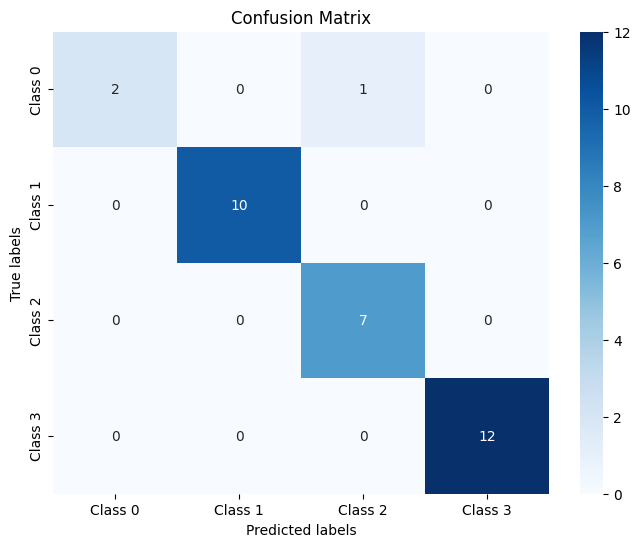

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Kiểm tra mô hình trên tập kiểm tra
model.eval()  # Đưa mô hình vào chế độ đánh giá (không tính gradient)
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    # In độ chính xác của mô hình trên tập kiểm tra
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

    # Tính confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Hiển thị confusion matrix dưới dạng heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')
torch.save(model, 'model_full.pth')
model = CNNModel()  # Initialize the model
torch.save(model.state_dict(), "model_state_dict.pth")


In [ ]:
model = CNNModel()  # Initialize the model
torch.save(model.state_dict(), "C:/Users/DELL/Documents/PlatformIO/Projects/QUANG_QUANG/vippro.pth")
import torch
import numpy as np

def predict_from_mfcc(mfcc_file, model_path):
    """
    Hàm dự đoán lớp cho một file .npy chứa đặc trưng MFCC.

    Parameters:
    - mfcc_file: Đường dẫn tới file .npy chứa đặc trưng MFCC.
    - model_path: Đường dẫn tới file mô hình đã huấn luyện (.pth).
    """
    try:
        # Tải mô hình đã huấn luyện
        model = torch.load(model_path)
        model.eval()  # Đặt mô hình ở chế độ đánh giá

        # Đọc dữ liệu MFCC từ file .npy
        mfcc_data = np.load(mfcc_file)

        # Kiểm tra shape của MFCC
        print(f"Shape of MFCC for {mfcc_file}: {mfcc_data.shape}")

        # Đảm bảo rằng kích thước đặc trưng đúng với mô hình (13, 63)
        if mfcc_data.shape != (13, 63):
            print(f"Đặc trưng MFCC của {mfcc_file} không có kích thước mong muốn. Cần điều chỉnh lại.")
        else:
            # Chuyển đổi MFCC thành tensor và định dạng thành [batch_size, channels, height, width]
            mfcc_tensor = torch.tensor(mfcc_data, dtype=torch.float32).unsqueeze(0)  # [1, 13, 63]

            # Chuyển dữ liệu sang thiết bị (CPU hoặc GPU)
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            mfcc_tensor = mfcc_tensor.to(device)

            # Chuyển mô hình sang thiết bị (GPU hoặc CPU)
            model = model.to(device)

            # Dự đoán với mô hình
            with torch.no_grad():
                output = model(mfcc_tensor)

            # In kết quả đầu ra
            print(f"Output của mô hình cho {mfcc_file}: {output}")

            # Tìm lớp có xác suất cao nhất (dự đoán)
            predicted_class = torch.argmax(output, dim=1)
            print(f"Lớp dự đoán cho {mfcc_file}: {predicted_class.item()}")

    except Exception as e:
        print(f"Error processing {mfcc_file}: {e}")

# Ví dụ sử dụng hàm
mfcc_file = "/content/output_audio/output85.npy"  # Đường dẫn tới file .npy chứa đặc trưng MFCC
model_path = "/content/model_full.pth"  # Đường dẫn tới mô hình đã huấn luyện
predict_from_mfcc(mfcc_file, model_path)


Shape of MFCC for /content/output_audio/output85.npy: (13, 63)
Output của mô hình cho /content/output_audio/output85.npy: tensor([[  1.4259, -10.8633,  17.6106,  -3.7473]])
Lớp dự đoán cho /content/output_audio/output85.npy: 2


<ipython-input-136-74bcd7dd936c>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


In [ ]:
mfcc_file = "/content/output_audio/output115.npy"  # Đường dẫn tới file .npy chứa đặc trưng MFCC
model_path = "/content/model_full.pth"  # Đường dẫn tới mô hình đã huấn luyện
predict_from_mfcc(mfcc_file, model_path)

Shape of MFCC for /content/output_audio/output115.npy: (13, 63)
Output của mô hình cho /content/output_audio/output115.npy: tensor([[ 0.5949, -3.9948,  7.3830,  1.4875]])
Lớp dự đoán cho /content/output_audio/output115.npy: 2


<ipython-input-136-74bcd7dd936c>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


In [ ]:
process_audio("/content/test/output33.wav", "/content/output_test")
mfcc_file = "/content/output_test/output33.npy"  # Đường dẫn tới file .npy chứa đặc trưng MFCC
model_path = "/content/model_full.pth"  # Đường dẫn tới mô hình đã huấn luyện
predict_from_mfcc(mfcc_file, model_path)

Đặc trưng MFCC đã được lưu tại: /content/output_test/output33.npy
Shape of MFCC for /content/output_test/output33.npy: (13, 63)
Output của mô hình cho /content/output_test/output33.npy: tensor([[1.4418, 2.6183, 0.6612, 0.4084]])
Lớp dự đoán cho /content/output_test/output33.npy: 1


<ipython-input-136-74bcd7dd936c>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


In [ ]:
import torch
import numpy as np

# Giả sử mô hình đã huấn luyện xong
model = torch.load("/content/model_full.pth")  # Đường dẫn tới mô hình đã huấn luyện
model.eval()  # Đặt mô hình ở chế độ đánh giá

# Đường dẫn đến dữ liệu (MFCC) đã được lưu dưới dạng .npy
data_file = "/content/drive/MyDrive/mfcc_features/reduced_output122.npy"  # Đường dẫn đến file .npy chứa đặc trưng MFCC

# Đọc dữ liệu đặc trưng MFCC
mfcc_data = np.load(data_file)  # Đọc dữ liệu MFCC từ file .npy

# Kiểm tra shape của MFCC
print(f"Shape of MFCC: {mfcc_data.shape}")

# Đảm bảo rằng kích thước đặc trưng đúng với mô hình (13, 63)
if mfcc_data.shape != (13, 63):
    print("Đặc trưng MFCC không có kích thước mong muốn. Cần điều chỉnh lại.")
else:
    # Chuyển đổi MFCC thành tensor và định dạng thành [batch_size, channels, height, width]
    mfcc_tensor = torch.tensor(mfcc_data, dtype=torch.float32).unsqueeze(0)  # [1, 13, 63]

    # Chuyển dữ liệu sang thiết bị (CPU hoặc GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    mfcc_tensor = mfcc_tensor.to(device)

    # Chuyển mô hình sang thiết bị (GPU hoặc CPU)
    model = model.to(device)

    # Dự đoán với mô hình
    with torch.no_grad():
        output = model(mfcc_tensor)

    # In kết quả đầu ra
    print(f"Output của mô hình: {output}")

    # Tìm lớp có xác suất cao nhất (dự đoán)
    predicted_class = torch.argmax(output, dim=1)
    print(f"Lớp dự đoán: {predicted_class.item()}")


Shape of MFCC: (13, 63)
Output của mô hình: tensor([[-5.7448, -0.9178, -2.7373,  6.9644]])
Lớp dự đoán: 3


<ipython-input-96-db0d2af5e2ac>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/content/model_full.pth")  # Đường dẫn tới mô hình đã huấn luyện
